In [14]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '../..')))

import pandas as pd
import matplotlib.pyplot as plt
from hydracv.classifier.classifier import Classifier
from tqdm import tqdm
from hydracv.utils.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Create object
classifier = Classifier()

In [16]:
# Set midpoints

# winlen_len: window-length for smoothing length data, larger value == smoother length curve
classifier.set_midpoints("./data/midpoints/Control-EGCaMP_exp1_a1_30x10fps_midpoints.csv",
                         winlen_len=51)

  0%|                                                                                         | 0/7489 [00:00<?, ?it/s]

Calculating curvature...


100%|█████████████████████████████████████████████████████████████████████████████| 7489/7489 [01:06<00:00, 113.27it/s]


Curvature set.


In [4]:
# Set videopath
classifier.set_videopath(" ")

In [6]:
# Run the classifier

# Parameters:
# winlen_slp: window-length for smoothing slope, larger value == smoother slope curve
# lo_slp_thres: higher bound of slope in predicting contraction, larger value == more sensitive to contraction
# hi_slp_thres: lower bound of slope in predicting elongation, smaller value == more sensitive to elongation
# lo_len_thres: higher bound of length in predicting CB, larger value == looser restriction to predict CB
# hi_len_thres: lower bound of length in predicting an elongated state, smaller value == looser restriction to predict elongated
# curv_thres: threshold of curvature to identify a bending behavior
# cb_no_elong: whether to deny the "bounding backs" during CB as elongation? True == Yes
classifier.classify(winlen_slp=51,
                    lo_slp_thres=-0.0005,
                    hi_slp_thres=0.0005,
                    lo_len_thres=0.2,
                    hi_len_thres=0.5,
                    curv_thres=0.004,
                    cb_no_elong=True,
                    elong_no_cb=True)

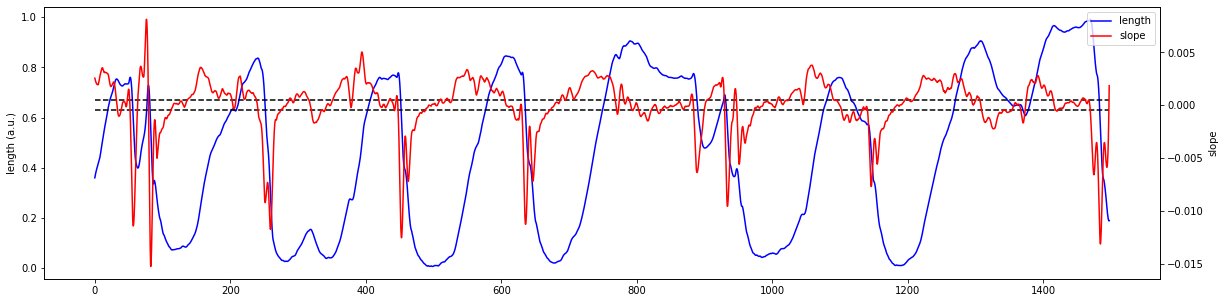

In [7]:
classifier.plot_slopes_and_lengths()

100%|██████████████████████████████████████████████████████████████████████████████| 7489/7489 [01:21<00:00, 92.22it/s]


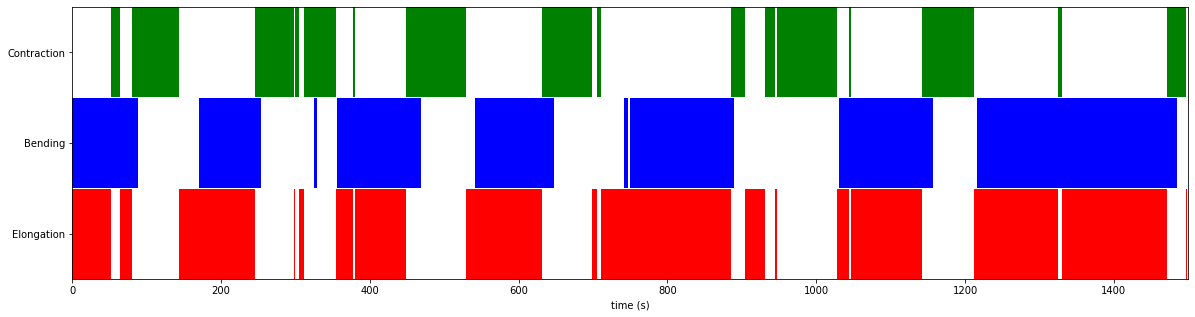

In [8]:
# Plot the behavior periods
classifier.plot_behavior_periods(savepath='./results/Control-EGCaMP_exp1_a1_30x10fps/classified_behaviors.png')

In [9]:
# Load manual labels
df = pd.read_csv('./data/manual_labels/EGCaMP6_Manual_Imaging_Analysis - Control-EGCaMP_L-typer_exp1_a1_30x10fps_5%.csv', header=1)

In [10]:
# Extract periods for each behavior
cb_periods = df[df.Behavior.str.contains('CB')]['Time of Event'].values
bend_periods = df[df.Behavior.str.contains('Bend')]['Time of Event'].values

In [11]:
# Reformat periods
bend_periods = reformat_periods(bend_periods, unit='sec')
cb_periods = reformat_periods(cb_periods, unit='sec')

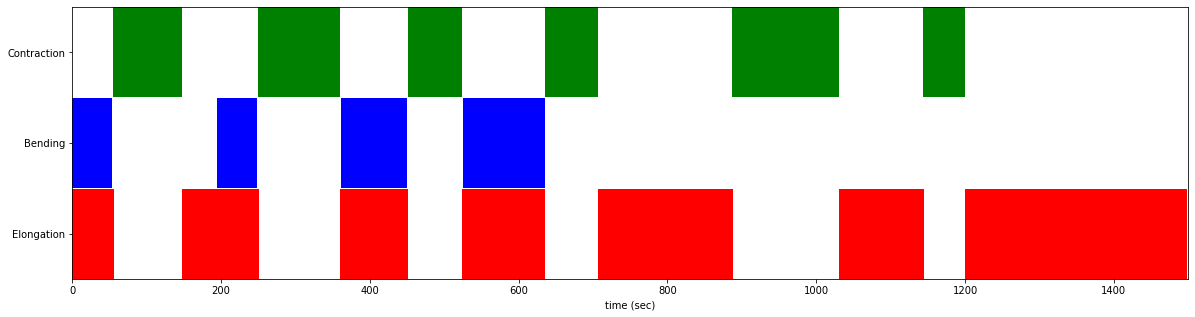

In [12]:
# Plot the periods

plt.figure(figsize=(20, 5))
# for period in elong_periods:
#     plt.hlines(1, period[0], period[1], colors='r', linewidth=90)
for period in bend_periods:
    plt.hlines(2, period[0], period[1], colors='b', linewidth=90)
for period in cb_periods[:-1]:
    plt.hlines(3, period[0], period[1], colors='g', linewidth=90)
for iframe in (range(classifier.nframes)):
    isec = iframe / classifier.fps
    flag = True
    for period in cb_periods[:-1]:
        if period[0] <= isec < period[1]:
            flag = False
            break
    if flag:
        plt.hlines(1, isec, isec+1, colors='r', linewidth=90)
plt.yticks([1,2,3], ['Elongation', 'Bending', 'Contraction'])
plt.ylim(0.5, 3.5)
plt.xlim(0, 1500)
plt.xlabel('time (sec)')
# plt.savefig('./results/Periods_'+FILENAME.strip('.csv')+'.png')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 7489/7489 [01:23<00:00, 90.06it/s]


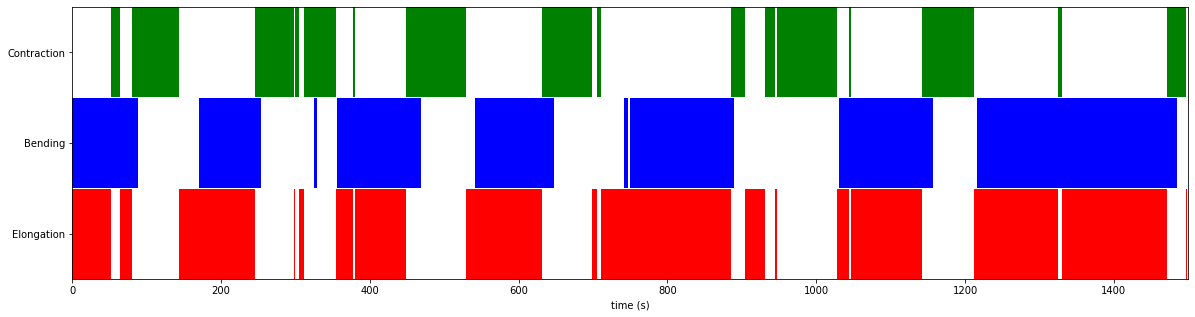

In [13]:
classifier.plot_behavior_periods()

In [11]:
# Save behaviors
df = pd.DataFrame(classifier.behaviors)
df.to_csv('./data/behaviors/Control-EGCaMP_exp1_a1_30x10fps/behaviors.csv')